In [115]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import plotly.express as px
from plotly.subplots import make_subplots
import cufflinks as cf
import seaborn as sns
cf.go_offline()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Get data

city = pd.read_csv("./data/diamonds_city.csv")
clarity = pd.read_csv("./data/diamonds_clarity.csv")
color = pd.read_csv("./data/diamonds_color.csv")
cut = pd.read_csv("./data/diamonds_cut.csv")
dimensions = pd.read_csv("./data/diamonds_dimensions.csv")
properties = pd.read_csv("./data/diamonds_properties.csv")
transactional = pd.read_csv("./data/diamonds_transactional.csv")

###Exploring all datasets before making any decision...###

In [8]:
print(city.info())
print(clarity.info())
print(color.info())
print(cut.info())
print(dimensions.info())
print(properties.info())
print(transactional.info())

#They have different number of rows and columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city_id  13 non-null     object
 1   city     13 non-null     object
dtypes: object(2)
memory usage: 340.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clarity_id  8 non-null      object
 1   clarity     8 non-null      object
dtypes: object(2)
memory usage: 260.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   color_id  7 non-null      object
 1   color     7 non-null      object
dtypes: object(2)
memory usage: 244.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 

In [5]:
city.head(5)

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris


In [6]:
clarity.head(5)

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2
2,66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...,VVS1
3,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF
4,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1


In [9]:
color.head(5)

,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I


In [10]:
cut.head(5)

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [11]:
dimensions.head(5)

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95


In [12]:
properties.head(5)

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...


In [13]:
transactional.head(5)

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02


In [37]:
#Create the dataframe we are going to work with:

diamonds = transactional.merge(properties)
diamonds

,index_id,price,city_id,carat,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [38]:
#Replacing id values with the property itself:

diamonds = pd.merge(diamonds, city, on='city_id', how='left')
diamonds = pd.merge(diamonds, clarity, on='clarity_id', how='left')
diamonds = pd.merge(diamonds, color, on='color_id', how='left')
diamonds = pd.merge(diamonds, cut, on='cut_id', how='left')
diamonds

,index_id,price,city_id,carat,cut_id,color_id,clarity_id,city,clarity,color,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Kimberly,VS2,J,Premium
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Antwerp,VS2,H,Very Good
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,London,VS1,G,Fair
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,New York City,SI1,D,Good
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,Dubai,SI1,G,Ideal
...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,New York City,VS1,G,Ideal
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,Zurich,SI2,F,Good
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,Tel Aviv,SI1,H,Ideal
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,Paris,VS1,J,Ideal


In [39]:
#Remove id columns:

diamonds = diamonds.drop(["city_id","cut_id","clarity_id", "color_id"], axis=1)
diamonds

,index_id,price,carat,city,clarity,color,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,Kimberly,VS2,J,Premium
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,0.32,Antwerp,VS2,H,Very Good
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,0.71,London,VS1,G,Fair
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,0.41,New York City,SI1,D,Good
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,1.02,Dubai,SI1,G,Ideal
...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,1.34,New York City,VS1,G,Ideal
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,2.02,Zurich,SI2,F,Good
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,1.01,Tel Aviv,SI1,H,Ideal
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,0.33,Paris,VS1,J,Ideal


In [40]:
diamonds = pd.merge(diamonds, dimensions, on='index_id', how='left')

In [41]:
#Complete dataframe:

diamonds

,index_id,price,carat,city,clarity,color,cut,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,Kimberly,VS2,J,Premium,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,0.32,Antwerp,VS2,H,Very Good,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,0.71,London,VS1,G,Fair,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,0.41,New York City,SI1,D,Good,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,1.02,Dubai,SI1,G,Ideal,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,1.34,New York City,VS1,G,Ideal,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,2.02,Zurich,SI2,F,Good,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,1.01,Tel Aviv,SI1,H,Ideal,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,0.33,Paris,VS1,J,Ideal,61.9,54.3,4.45,4.47,2.76


In [50]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   price     40455 non-null  int64  
 2   carat     40455 non-null  float64
 3   city      40455 non-null  object 
 4   clarity   40455 non-null  object 
 5   color     40455 non-null  object 
 6   cut       40455 non-null  object 
 7   depth     40455 non-null  float64
 8   table     40455 non-null  float64
 9   x         40455 non-null  float64
 10  y         40455 non-null  float64
 11  z         40455 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


In [42]:
diamonds.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


In [129]:
#Proporciones de cut:

cut_prop = diamonds["cut"].value_counts(normalize=True)
cut_prop

cut
Ideal        0.400939
Premium      0.253615
Very Good    0.224818
Good         0.090545
Fair         0.030083
Name: proportion, dtype: float64

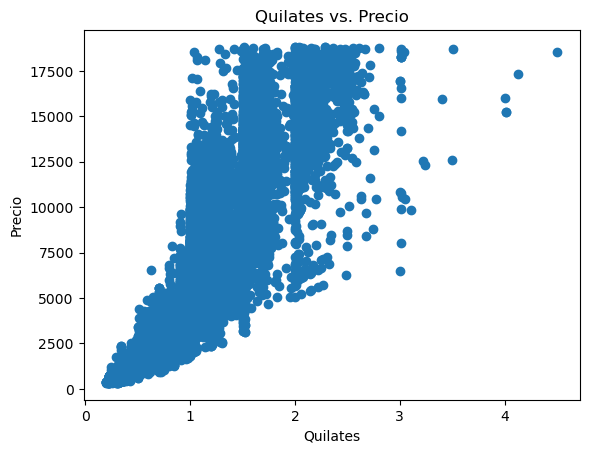

In [57]:
diamonds_sorted = diamonds.sort_values(by='price')

plt.scatter(diamonds_sorted['carat'], diamonds_sorted['price'])

plt.xlabel('Quilates')
plt.ylabel('Precio')
plt.title('Quilates vs. Precio')

plt.show()

In [148]:
#Histogram for every numerical features:

@interact(feature = diamonds.select_dtypes(["int64", "float64"]).columns)

def histogram(feature):
    fig = sns.histplot(x=feature, data=diamonds)
    fig.set_title(f"Histogram for {feature}")
    fig

interactive(children=(Dropdown(description='feature', options=('price', 'carat', 'depth', 'table', 'x', 'y', '…

In [127]:
#Boxplot for every numeric feature:

@interact(feature = diamonds.select_dtypes(["int64", "float64"]).columns)

def boxplot(feature):
    fig = sns.boxplot(x=feature, data=diamonds)
    fig.set_title(f"Distribution for {feature}")
    fig
    
#En el boxplot de precio se puede ver que, a partir de un determinado precio, los precios varían muchísimo más. 

interactive(children=(Dropdown(description='feature', options=('price', 'carat', 'depth', 'table', 'x', 'y', '…

<Axes: >

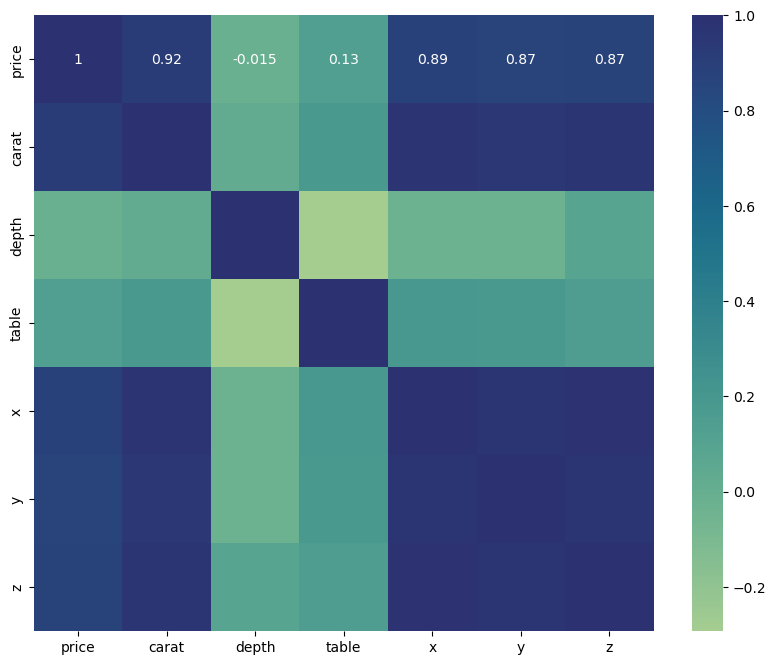

In [139]:
#Correlation matrix to know what variables is more worth exploring:

diamonds_matrix = diamonds.select_dtypes(["int64", "float64"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(diamonds_matrix, annot=True, cmap = "crest")

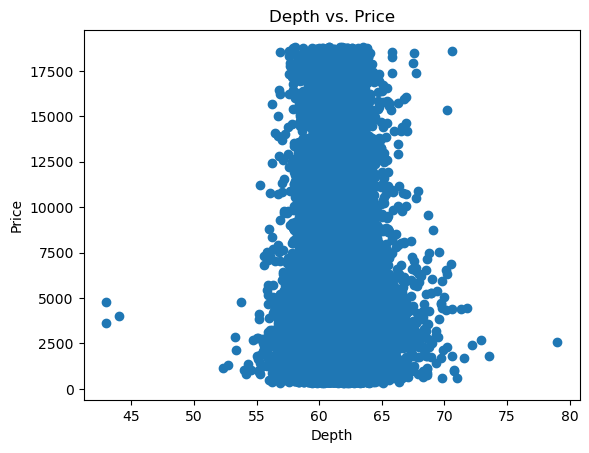

In [143]:
diamonds_sorted = diamonds.sort_values(by='price')

plt.scatter(diamonds_sorted['depth'], diamonds_sorted['price'])

plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Depth vs. Price')

plt.show()

#En todos los rangos de precio la depth es similar.

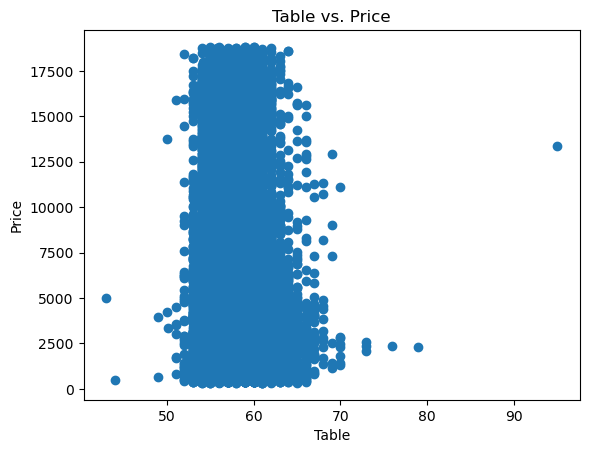

In [144]:
diamonds_sorted = diamonds.sort_values(by='price')

plt.scatter(diamonds_sorted['table'], diamonds_sorted['price'])

plt.xlabel('Table')
plt.ylabel('Price')
plt.title('Table vs. Price')

plt.show()

#En todos los rangos de precio, la table es similar.

In [145]:
cities_prop = diamonds["city"].value_counts(normalize=True)
cities_prop

city
Antwerp          0.125127
Surat            0.124756
Kimberly         0.124583
Zurich           0.064121
Paris            0.063750
Las Vegas        0.063231
Amsterdam        0.062885
Tel Aviv         0.062613
Luxembourg       0.062390
Madrid           0.061896
New York City    0.061673
Dubai            0.061500
London           0.061476
Name: proportion, dtype: float64